# **Task 4 - To Explore Decision Tree Algorithm**

##For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# **Importing Essential Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Loading the dataset**

In [ ]:
df=pd.read_csv('IRIS.csv')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# **Checking the first five rows**

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Checking column datatypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **Checking important statistics parametes**

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Plotting inter-relation of all the attributes / Exploratory Data Analysis**

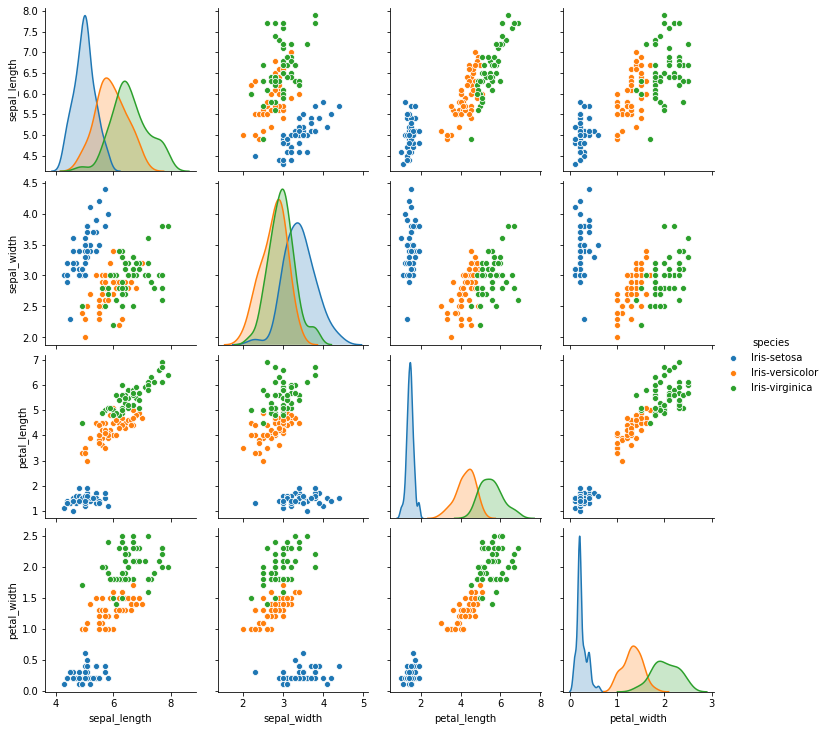

In [ ]:
sns.pairplot(df,hue='species')

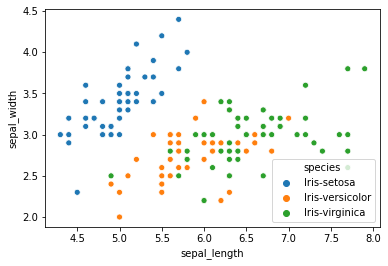

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)

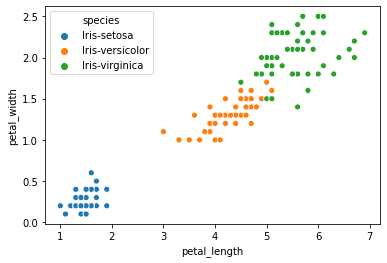

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=df)

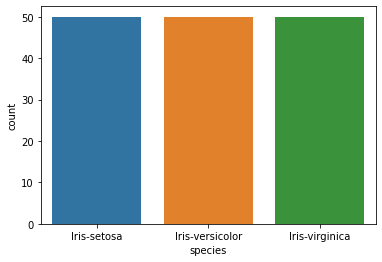

In [ ]:
sns.countplot(df['species'])

# **Creating test and train datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('species',axis=1)
y=df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **Importing Decision Tree Classifier from Scikit Learn, fitting and predicting the values**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
predic=tree.predict(X_test)

# **Developing Classification Report**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predic))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# **Developing Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test,predic))

[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]


# **Importing accuracy score**

In [ ]:
from sklearn.metrics import accuracy_score

# **Calculating accuracy of model**

In [ ]:
print(accuracy_score(y_test,predic))

1.0


# **Installing libraries for visualization task**

In [ ]:
# Installing required libraries for the task
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


# **Importing tools for tree visualization**

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# **Visualization of tree classifier**

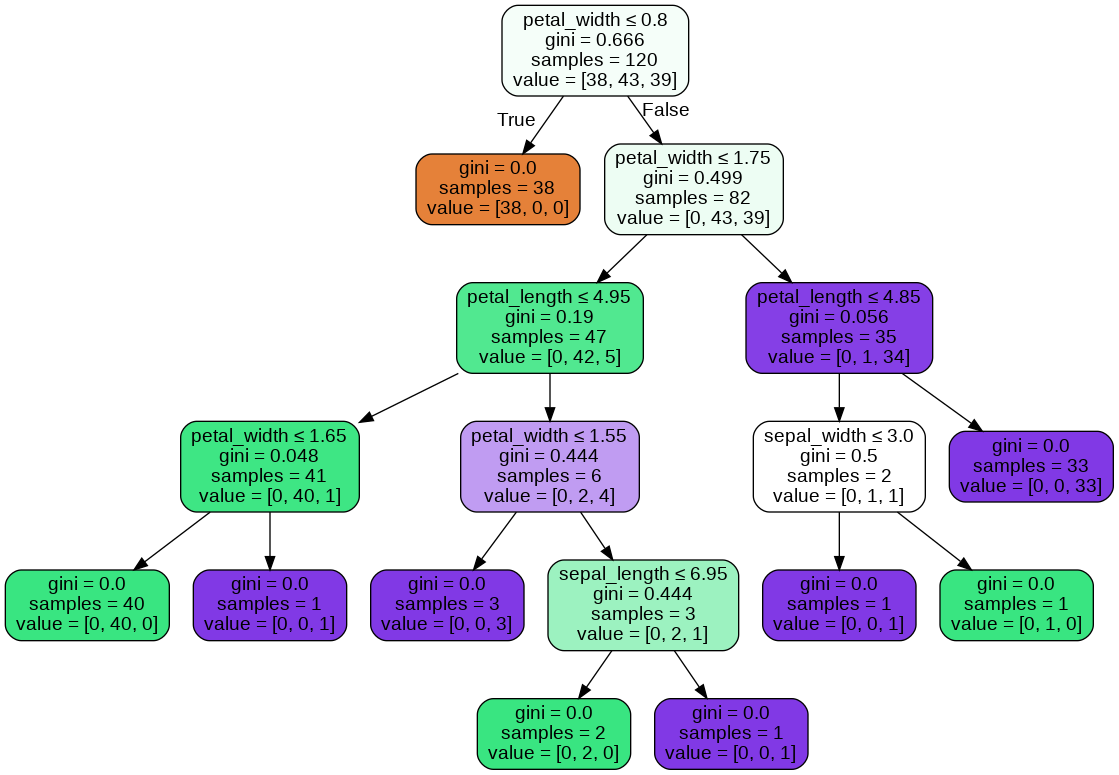

In [ ]:
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())